# Bài tập 1:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
# load data
data = pd.read_csv("data/advertising.csv")

data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [2]:
def get_columns(data, index):
    # get all row of index column
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_data):
    data = np.genfromtxt(file_name_data, skip_header=1, delimiter=',').tolist()
    
    tv_data = get_columns(data, 0)
    radio_data = get_columns(data, 1)
    newspaper_data = get_columns(data, 2)
    sales_data = get_columns(data, 3)

    # Build X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data

    return X, y


In [3]:
# Question 1:
X, y = prepare_data("data/advertising.csv")
list = [[sum(x[:5]) for x in X], sum(y[:5])]
list

[[624.1, 175.1, 300.5], 78.9]

# Bài tập 2:

In [4]:
def initialize_parameters():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344 , 0)
    return w1, w2, w3, b


In [5]:
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1 * x1 + w2 * x2 + w3 * x3 + b

In [6]:
# Question 2:
y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0.5, b=0)
print(y)

1.0


In [7]:
def compute_loss_mse(y, y_hat):
    return (y_hat - y)**2

In [8]:
# Question 3:
l = compute_loss_mse(y=1, y_hat=0.5)
print(l)

0.25


In [9]:
def compute_loss_mae(y, y_hat):
    return abs(y_hat - y)


In [10]:
def compute_gradient_wi(x, y, y_hat):
    return 2*x*(y_hat - y)


In [11]:
# Question 4:
g_wi = compute_gradient_wi(x=1, y=1, y_hat=0.5)
print(g_wi)

-1.0


In [12]:
def compute_gradient_b(y, y_hat):
    return 2*(y_hat - y)

In [13]:
# Question 5:
g_b = compute_gradient_b(y=1, y_hat=0.5)
print(g_b)

-1.0


In [14]:
def update_weight_wi(wi, dl_dwi, learning_rate):
    return wi - learning_rate * dl_dwi

In [15]:
# Question 6:
after_wi = update_weight_wi(1, -0.5, 1e-5)
print(after_wi)

1.000005


In [16]:
def update_weight_b(b, dl_db, learning_rate):
    return b - learning_rate * dl_db

In [17]:
# Question 7:
after_b = update_weight_b(0.5, -1, 1e-5)
print(after_b)

0.50001


In [18]:
def implement_linear_regression(X, y, learning_rate=1e-5, epochs=50, mse=True):
    losses = []
    w1, w2, w3, b = initialize_parameters()
    N = len(y)

    for epoch in range(epochs):
        for i in range(N):
            x1 = X[0][i]
            x2 = X[1][i]
            x3 = X[2][i]

            # compute y_hat
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss wiht mse (Mean Squared Error)
            if mse: 
                loss = compute_loss_mse(y[i], y_hat)
            else:
                loss = compute_loss_mae(y[i], y_hat)


            # Compute gradient for w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y[i], y_hat)
            dl_dw2 = compute_gradient_wi(x2, y[i], y_hat)
            dl_dw3 = compute_gradient_wi(x3, y[i], y_hat)
            dl_db = compute_gradient_b(y[i], y_hat)

            # Update w1, w2, w3, b
            w1 = update_weight_wi(w1, dl_dw1, learning_rate)
            w2 = update_weight_wi(w2, dl_dw2, learning_rate)
            w3 = update_weight_wi(w3, dl_dw3, learning_rate)
            b = update_weight_b(b, dl_db, learning_rate)

            losses.append(loss)

    return w1, w2, w3, b, losses


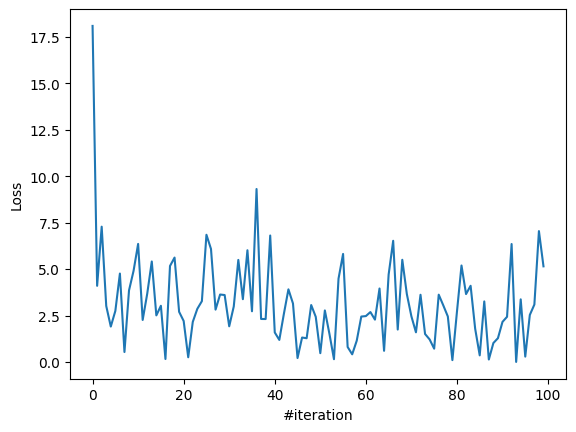

In [19]:
X, y = prepare_data("data/advertising.csv")
w1, w2, w3, b, loss = implement_linear_regression(X, y, mse=False)

plt.plot(loss[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()
# Question 9:

In [20]:
# Question 8:
X, y = prepare_data("data/advertising.csv")
w1, w2, w3, b, loss = implement_linear_regression(X, y)
print(w1, w2, w3, b)

0.07405984066396477 0.15917360263437663 0.017561197559948935 0.13924260940219846


In [21]:
# Question 9:
# given new data 
tv = 19.2
radio = 35.9 
newspaper = 51.3
X,y = prepare_data('data/advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X, y, epochs=50, learning_rate=1e-5) 
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


# Bài tập 3:

In [22]:
# Question 10:
l = compute_loss_mae(y=1, y_hat=0.5)
print(l)

0.5


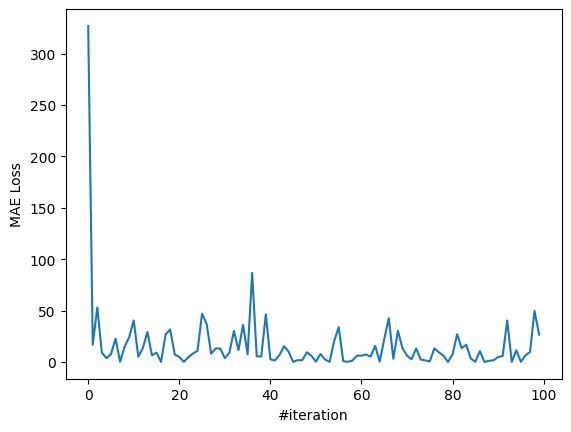

In [23]:
X, y = prepare_data("data/advertising.csv")
w1, w2, w3, b, losses = implement_linear_regression(X, y, epochs=100)

plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("MAE Loss")
plt.show()


In [24]:
def implement_linear_regression_N_samles(X, y, learning_rate=1e-5, epochs=50):
    losses = []
    w1, w2, w3, b = initialize_parameters()
    N = len(y)

    for epoch in range(epochs):
        dw1_total = 0
        dw2_total = 0
        dw3_total = 0
        db_total = 0

        loss_total = 0

        for i in range(N):
            x1 = X[0][i]
            x2 = X[1][i]
            x3 = X[2][i]

            # compute y_hat
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss wiht mse (Mean Squared Error)
            loss = compute_loss_mse(y[i], y_hat)
            loss_total += loss

            # Compute gradient for w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y[i], y_hat)
            dl_dw2 = compute_gradient_wi(x2, y[i], y_hat)
            dl_dw3 = compute_gradient_wi(x3, y[i], y_hat)
            dl_db = compute_gradient_b(y[i], y_hat)

            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db


            # Update w1, w2, w3, b
        w1 = update_weight_wi(w1, dw1_total/N, learning_rate)
        w2 = update_weight_wi(w2, dw2_total/N, learning_rate)
        w3 = update_weight_wi(w3, dw3_total/N, learning_rate)
        b = update_weight_b(b, db_total/N, learning_rate)

        losses.append(loss_total/N)
    return w1, w2, w3, b, losses



            
            

[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

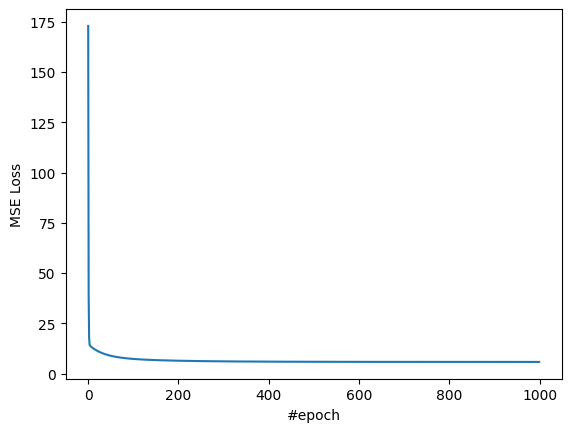

In [25]:
X, y = prepare_data("data/advertising.csv")
w1, w2, w3, b, losses = implement_linear_regression_N_samles(X, y, epochs=1000, learning_rate=1e-5)

print(losses)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()

# Bài tập 4:

In [ ]:
def prepare_data(file_name_data):
    data = np.genfromtxt(file_name_data, delimiter=',', skip_header=1)

    tv_data = get_columns(data, 0)
    radio_data = get_columns(data, 1)
    newspaper_data = get_columns(data, 2)
    sales_data = get_columns(data, 3)

    y = sales_data

    X = [[1, tv, radio, newspaper] for tv, radio, newspaper in zip(tv_data, radio_data, newspaper_data)]
    return X, y

X, y = prepare_data("data/advertising.csv")


In [28]:
def initialize_parameters():
    bias = 0
    w1 = random.gauss(0, 0.01)
    w2 = random.gauss(0, 0.01)
    w3 = random.gauss(0, 0.01)
    return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]


In [37]:
def predict(X_feature, weight):
    return sum([x*w for x, w in zip(X_feature, weight)])


In [30]:
def compute_loss_mse(y_hat, y):
    return (y_hat - y) ** 2

In [ ]:
def compute_gradient(X_feature, y, y_hat):
    return [2*x*(y_hati - yi) for x, yi, y_hati in zip(X_feature, y, y_hat)]

In [ ]:
def update_weight(weight, gradient, learning_rate):
    return [weighti - learning_rate * gradienti for weighti, gradienti in zip(weight, gradient)]

In [38]:
def implement_linear_regression_v2(X, y, learning_rate=1e-5, epochs=50):
    weight = initialize_parameters()
    losses = []

    N = len(y)
    for _ in range(epochs):
        for i in range(N):
            x = X[i]
            y_label = y[i]
            y_hat = predict(x, weight)
            loss = compute_loss_mse(y_hat, y_label)
            losses.append(loss)

            gradient = compute_gradient(x, y_label, y_hat)
            weight = update_weight(weight, gradient, learning_rate)

    return weight, losses

In [ ]:
X, y = prepare_data("data/advertising.csv")
weight, losses = implement_linear_regression_v2(X, y, epochs=1000, learning_rate=1e-5)

plt.plot(losses[0:100])
plt.xlabel("#Iteration")
plt.ylabel("Loss")
plt.show()

